In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!pip install pandas
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('../input/traintrain/train.csv')
print(data.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
data.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

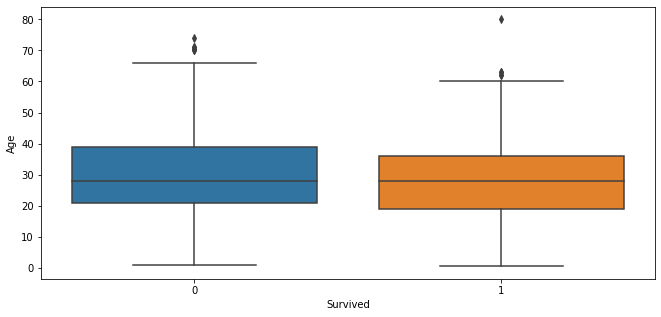

In [20]:
data=pd.read_csv('../input/traintrain/train.csv')
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x='Survived', y="Age",  data=data);

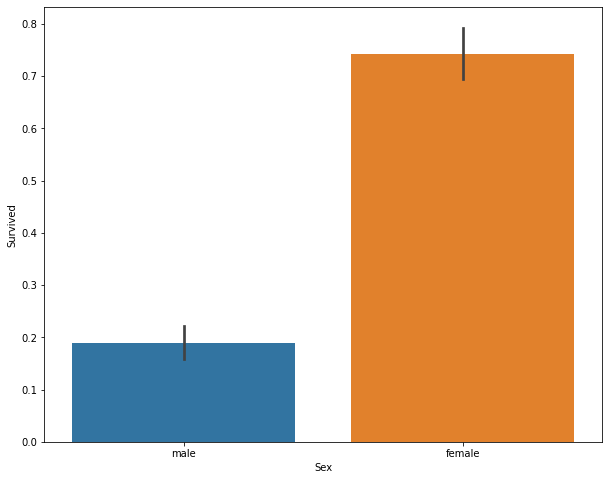

In [21]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Sex', y="Survived",  data=data);

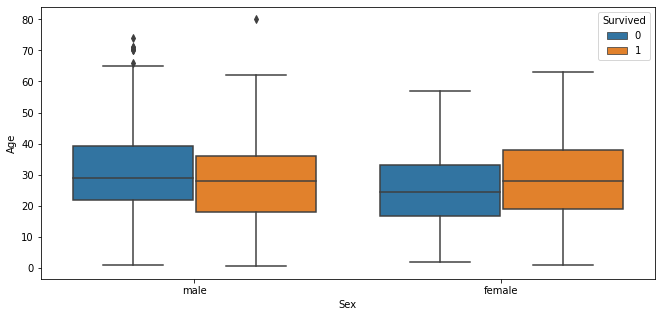

In [25]:
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=data);

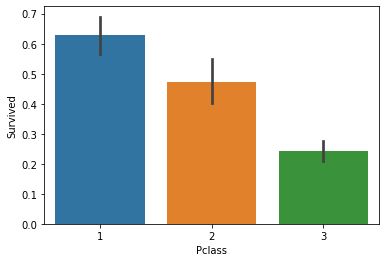

In [27]:
sns.barplot(x="Pclass", y="Survived", data=data);

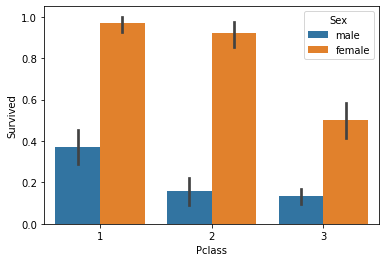

In [28]:
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=data);

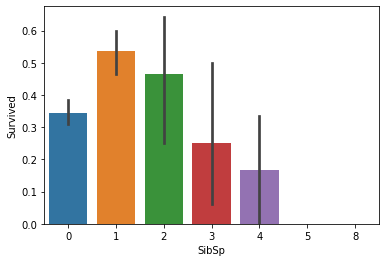

In [29]:
sns.barplot(x="SibSp", y="Survived", data=data);

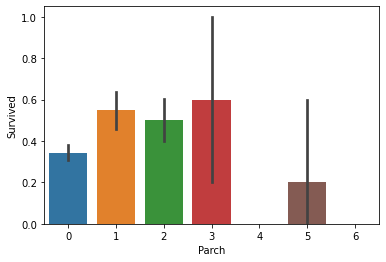

In [30]:
sns.barplot(x="Parch", y="Survived", data=data);

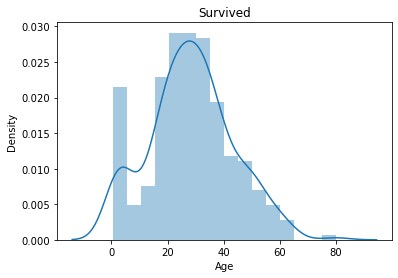

In [31]:
survived = data.loc[data['Survived']==1,"Age"].dropna()
sns.distplot(survived)
plt.title("Survived");

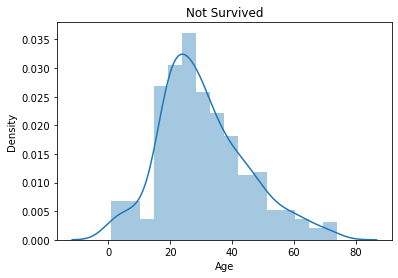

In [32]:
not_survived = data.loc[data['Survived']==0,"Age"].dropna()
sns.distplot(not_survived)
plt.title("Not Survived");

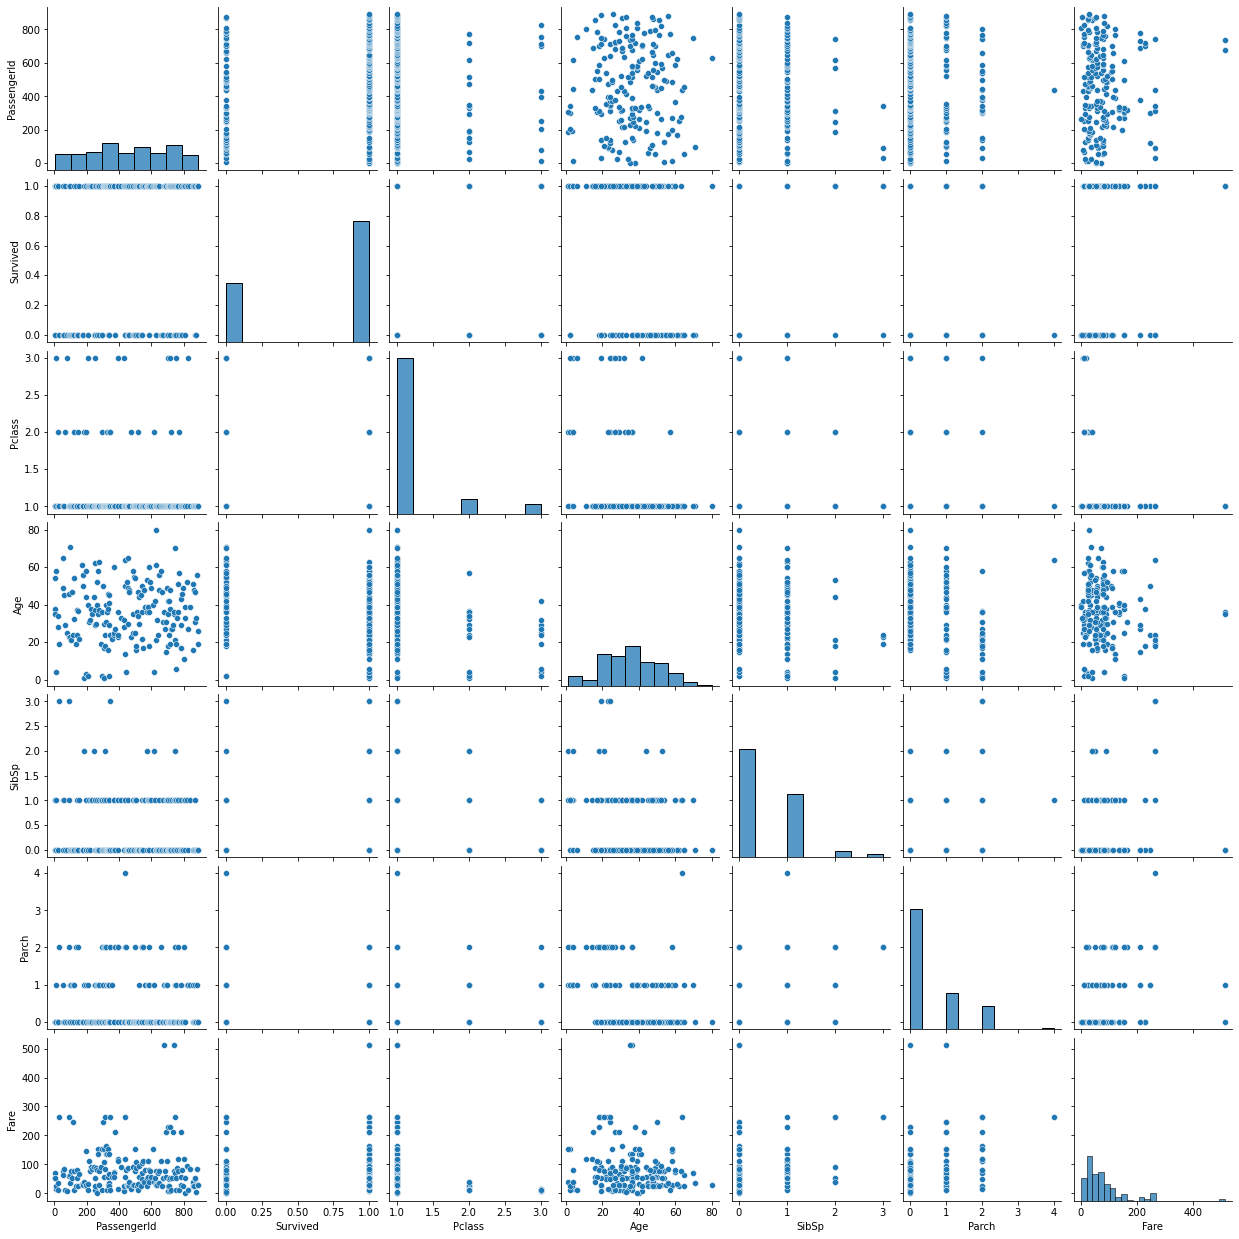

In [33]:
sns.pairplot(data.dropna());

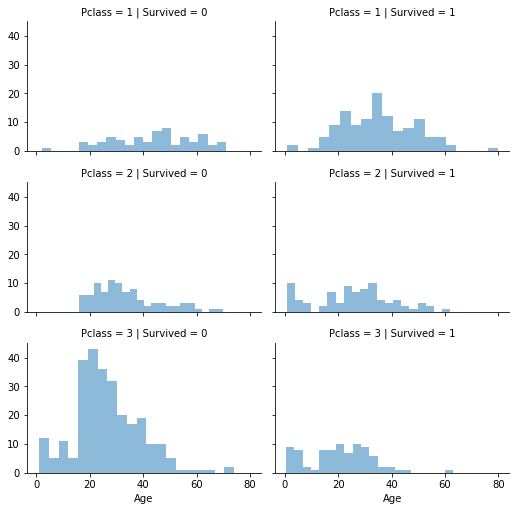

In [34]:
#Pclass vs Survive
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.4, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

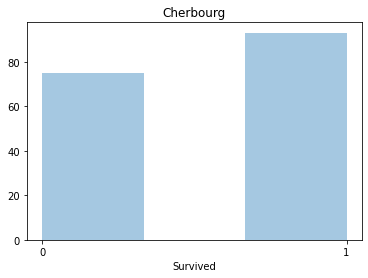

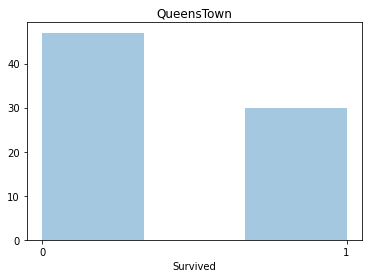

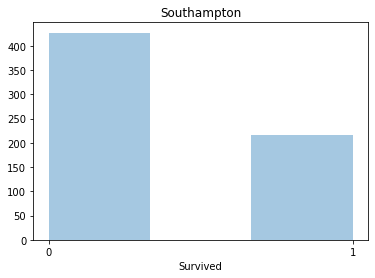

In [38]:
sns.distplot(a=data[data['Embarked']=='C']['Survived'],bins=3,kde=False)
plt.title("Cherbourg")
plt.xticks([0,1])
plt.show()
plt.title("QueensTown")
sns.distplot(a=data[data['Embarked']=='Q']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()
plt.title("Southampton")
sns.distplot(a=data[data['Embarked']=='S']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()
#Most of the Passengers embarked from Southampton

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

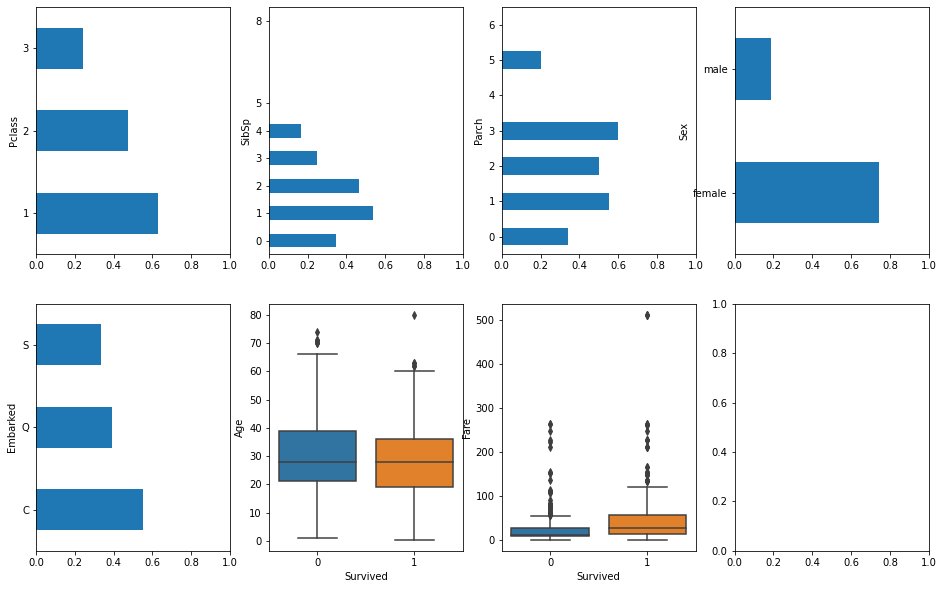

In [40]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])